In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [57]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v6_241211"

cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

In [58]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0')
df_bkg = df_bkg.query('Pip_p>0.3')
df_bkg = df_bkg.query('Dp_M> 1.6 & Dp_M<2.1')

In [59]:
df_bkg.describe()

,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,6425491.0,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06,7.480795e+06
mean,3.629518e+00,6.555747e+00,2.068096e+00,5.425332e+03,3.656279e+03,-2.277987e-01,5.086223e-03,0.0,9.150641e-02,1.387625e+00,3.035439e+00,2.241894e+00,5.092129e-01,1.813094e+00,-9.647255e-01
std,6.543595e-01,7.074407e+00,3.879436e+00,2.200190e+05,9.009698e+04,6.667839e-01,1.426159e-02,0.0,9.464490e-01,1.062984e+00,4.783314e-01,1.102812e+00,2.904963e-01,1.424658e-01,2.713105e-01
min,1.998992e+00,0.000000e+00,0.000000e+00,-9.000211e+06,-9.000211e+06,-9.999998e-01,2.289982e-11,0.0,-1.000000e+00,3.000001e-01,2.500000e+00,4.000006e-01,4.842877e-04,1.600000e+00,-1.000000e+00
25%,3.142770e+00,2.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,-8.362074e-01,1.025282e-03,0.0,-9.945514e-01,4.668708e-01,2.663338e+00,1.214448e+00,2.538103e-01,1.689263e+00,-1.000000e+00
50%,3.566221e+00,4.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,-5.157024e-01,2.322749e-03,0.0,7.897651e-01,9.175713e-01,2.895889e+00,2.378757e+00,5.115264e-01,1.791880e+00,-1.000000e+00
75%,4.002107e+00,8.000000e+00,2.000000e+00,2.110000e+02,2.300000e+01,4.699558e-01,4.939700e-03,0.0,9.986797e-01,2.239948e+00,3.279390e+00,3.062001e+00,7.677003e-01,1.929710e+00,-1.000000e+00
max,1.666676e+01,1.040000e+02,6.700000e+01,9.030221e+06,9.030221e+06,9.999565e-01,9.922414e-01,0.0,1.000000e+00,1.527562e+01,1.699166e+01,8.784445e+00,9.994925e-01,2.100000e+00,6.000000e+00


In [60]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [70]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["Dptoetapip_pipipi", "Dptoetapip_pipipi_cc"]
# elements_sig += ["Dsptoetapip_pipipi", "Dsptoetapip_pipipi_cc"]

# project_name = "241129_loose_v3"
project_name = "241211_loose_v6"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)
# print(file_list_sig)



In [71]:
dataframes_signal = []
for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names
    branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')

In [72]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
# elements_sig = ["Dptoetapip_pipipi", "Dptoetapip_pipipi_cc"]
elements_sig = ["Dsptoetapip_pipipi", "Dsptoetapip_pipipi_cc"]

# project_name = "241129_loose_v3"
project_name = "241211_loose_v6"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)
# print(file_list_sig)



In [73]:
dataframes_signal = []
for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names
    branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal_Ds = pd.concat(dataframes_signal, ignore_index=True)
df_signal_Ds = df_signal_Ds.query('(Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

In [74]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
df_signal_Ds = df_signal_Ds.query('Pip_p>0.3')

In [75]:
df_signal = pd.concat([df_signal, df_signal_Ds], ignore_index=True)


In [76]:
df_signal.describe()

,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06,1.437363e+06
mean,4.030470e+00,1.007285e+01,1.007285e+01,8.399625e-01,8.399625e-01,-2.046239e-01,1.835197e-02,4.852518e-01,9.005200e-01,1.571665e+00,3.369816e+00,2.458805e+00,5.034415e-01,1.917357e+00,-8.384354e-01
std,7.085533e-01,5.414432e+00,5.414432e+00,4.214128e+02,4.214128e+02,5.015672e-01,2.584332e-02,4.997826e-01,4.097011e-01,9.191998e-01,5.508901e-01,9.543302e-01,3.129297e-01,5.375176e-02,5.565972e-01
min,2.270196e+00,3.000000e+00,3.000000e+00,-4.310000e+02,-4.310000e+02,-9.999992e-01,2.860350e-08,0.000000e+00,-1.000000e+00,9.331539e-02,2.500001e+00,4.000231e-01,8.117557e-04,1.500055e+00,-1.000000e+00
25%,3.508956e+00,7.000000e+00,7.000000e+00,-4.310000e+02,-4.310000e+02,-6.431307e-01,3.544582e-03,0.000000e+00,9.989383e-01,7.995942e-01,2.909713e+00,1.750039e+00,2.094342e-01,1.868774e+00,-1.000000e+00
50%,3.961253e+00,9.000000e+00,9.000000e+00,4.110000e+02,4.110000e+02,-2.533150e-01,9.531702e-03,0.000000e+00,9.999163e-01,1.436967e+00,3.313200e+00,2.429880e+00,5.029373e-01,1.935828e+00,-1.000000e+00
75%,4.489559e+00,1.300000e+01,1.300000e+01,4.310000e+02,4.310000e+02,1.966393e-01,2.269664e-02,1.000000e+00,9.999945e-01,2.196143e+00,3.775988e+00,3.104272e+00,7.984465e-01,1.967535e+00,-1.000000e+00
max,7.258958e+00,6.500000e+01,6.500000e+01,4.310000e+02,4.310000e+02,9.887272e-01,9.927336e-01,1.000000e+00,1.000000e+00,5.886844e+00,5.285586e+00,6.431946e+00,9.989863e-01,2.099987e+00,6.000000e+00


In [77]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['Dp_M','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)


In [79]:
df_combined.describe()

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,label
count,2.874726e+06,2.874726e+06,2.874726e+06,2.874726e+06,2874726.0
mean,3.830442e+00,-2.161208e-01,1.172186e-02,4.964045e-01,0.5
std,7.108148e-01,5.902061e-01,2.187245e-02,8.337064e-01,0.5
min,2.151534e+00,-9.999992e-01,2.289982e-11,-1.000000e+00,0.0
25%,3.306160e+00,-7.649820e-01,1.617466e-03,-3.880603e-02,0.0
50%,3.755843e+00,-3.445089e-01,4.286311e-03,9.988442e-01,0.5
75%,4.263234e+00,2.984817e-01,1.239142e-02,9.999661e-01,1.0
max,1.036952e+01,9.999565e-01,9.927336e-01,1.000000e+00,1.0


In [80]:
plt.rcParams['font.family'] = 'DejaVu Sans'


In [81]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# # plt.rcParams['text.usetex'] = True

# # # Rename the features
# feature_names = {
#     'Pip_dr': r'$dr(\pi^+)$',
#     'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
#     'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
#     'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
# }

# # # Apply the renaming
# df_combined.rename(columns=feature_names, inplace=True)

# # Compute the correlation matrix
# corr_matrix = df_combined.drop(columns=['label']).corr()

# plt.rcParams['font.family'] = 'DejaVu Sans'

# # Plot the correlation matrix with larger annotation text
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
#             vmin=-1, vmax=1,  # Set the limits of the colormap
#             xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
#             annot_kws={"size": 14})  # Increase the size of the correlation numbers

# # Set the title and label sizes
# plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
# plt.xticks(fontsize=14)  # X-axis label size
# plt.yticks(fontsize=14)  # Y-axis label size

# # # Ensure the path is expanded correctly
# # save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# # plt.tight_layout()
# # # Save the figure
# # plt.savefig(save_path)
# plt.savefig("MC15rd_etapip_pipipi_corr_loose_v2.png")

# plt.show()


In [82]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# import joblib
# model_file = "best_xgb_model_etapip_pipipi.pkl"
# best_xgb_model = joblib.load(model_file)

In [84]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }
# param_grid = {
#     'n_estimators': [100, 300, 500, 700, 900, 1100],
#     'max_depth': [5, 7, 9, 11],
#     'learning_rate': [0.005, 0.01, 0.1, 0.2],
#     'subsample': [0.8,0.9, 1.0],
#     'colsample_bytree': [0.8,0.9, 1.0]
# }
# # Initialize GridSearchCV with cross-validation
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=28
# )

# # Perform the grid search
# grid_search.fit(X, y)



# # Get the best model and its parameters
# best_xgb_model = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Save the best model if needed
# import joblib
# joblib.dump(best_xgb_model, 'MC15rd_best_xgb_model_etapip_pipipi_loose_v3.pkl')


xgb_model.fit(X,y)
best_xgb_model = xgb_model


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [73]:
from pprint import pprint

# Print the hyperparameters of the XGBoost model
pprint(best_xgb_model.get_params())


{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}


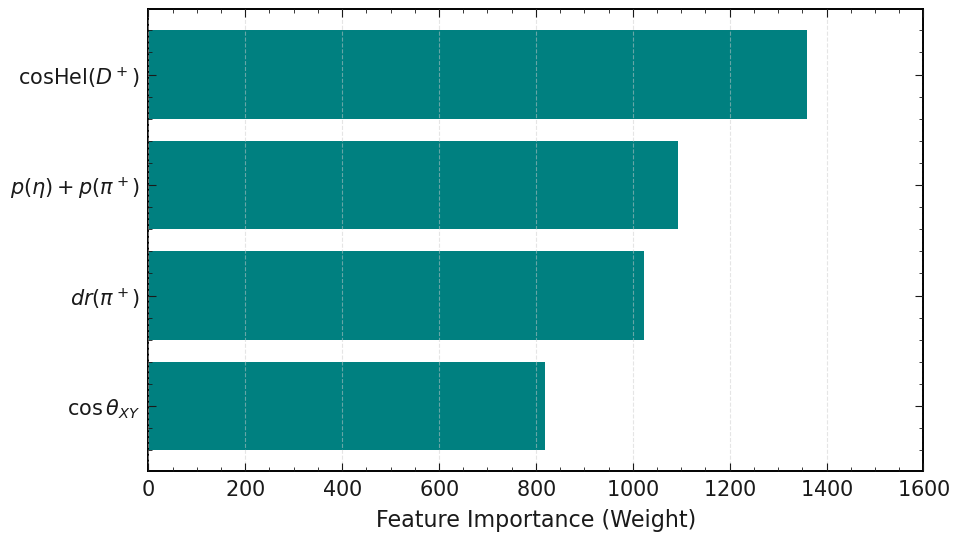

In [85]:
# Extract the underlying Booster object from the trained XGBClassifier
booster = best_xgb_model.get_booster()

# Get the feature importances with 'weight'
importance_dict = booster.get_score(importance_type='weight')

# The rest of the code remains the same
import pandas as pd

# Rename the features for display
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# Convert to a DataFrame for easier manipulation
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Weight'])
importance_df.index = [feature_names.get(f, f) for f in importance_df.index]  # Rename using LaTeX labels
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Weight'], color='teal')
plt.xlabel('Feature Importance (Weight)', fontsize=16)
# plt.title('Feature Importances with Customized Labels', fontsize=14)
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.5)

# plt.savefig("MC15rd_etapip_pipipi_importance_loose_v3.png")

# Show plot
plt.show()

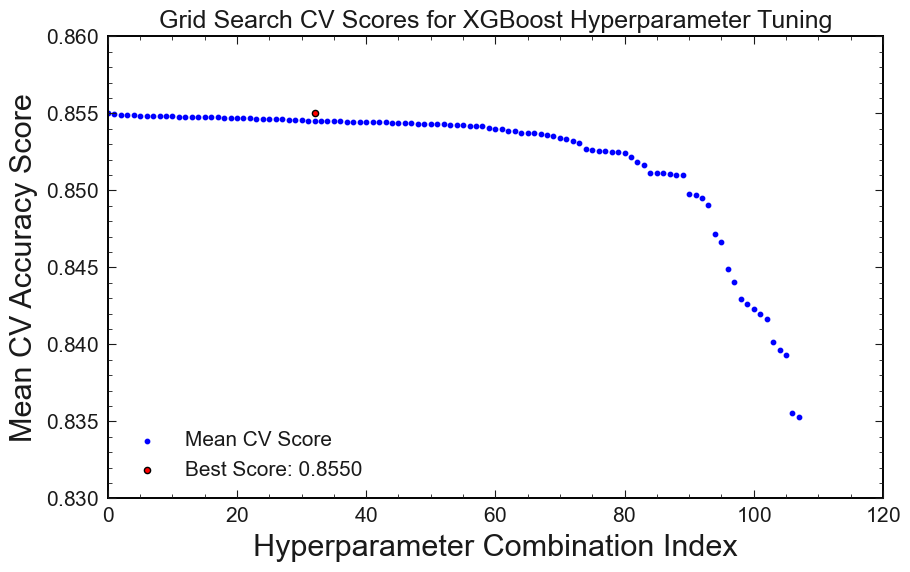

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = pd.DataFrame(random_search.cv_results_)


# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_
# best_score = random_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend(loc="lower left")
plt.xlim(0,)
# Save the figure
plt.savefig("MC15rd_etapip_pipipi_gridsearch_loose_v3.png")

# Show the plot
plt.show()


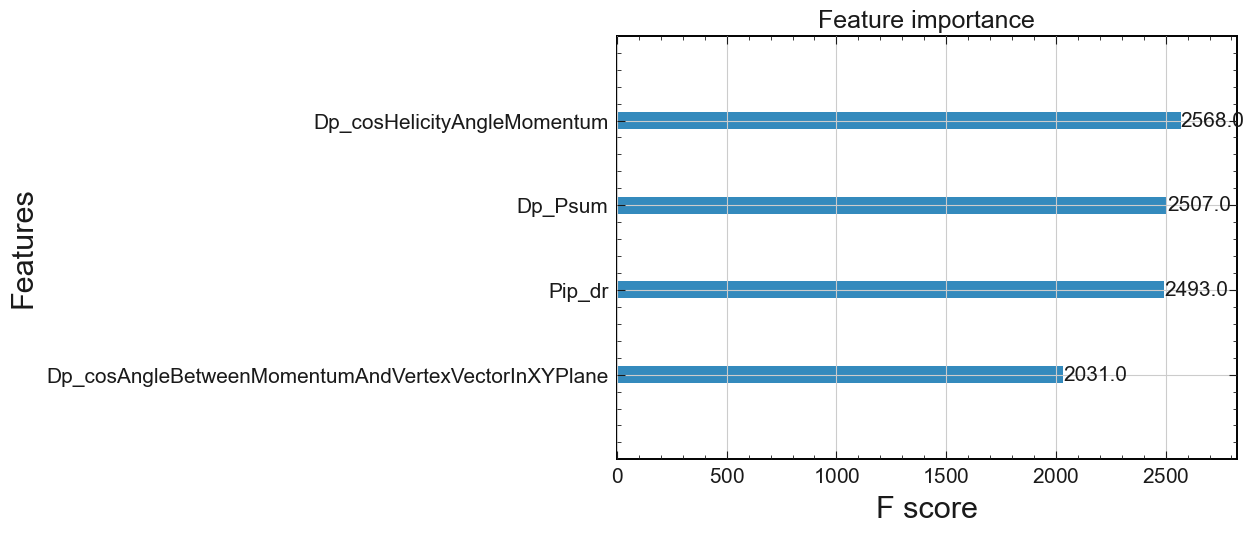

In [77]:
import xgboost as xgb
model = best_xgb_model
xgb.plot_importance(model, importance_type='weight')  # 'weight', 'gain', or 'cover'
plt.show()

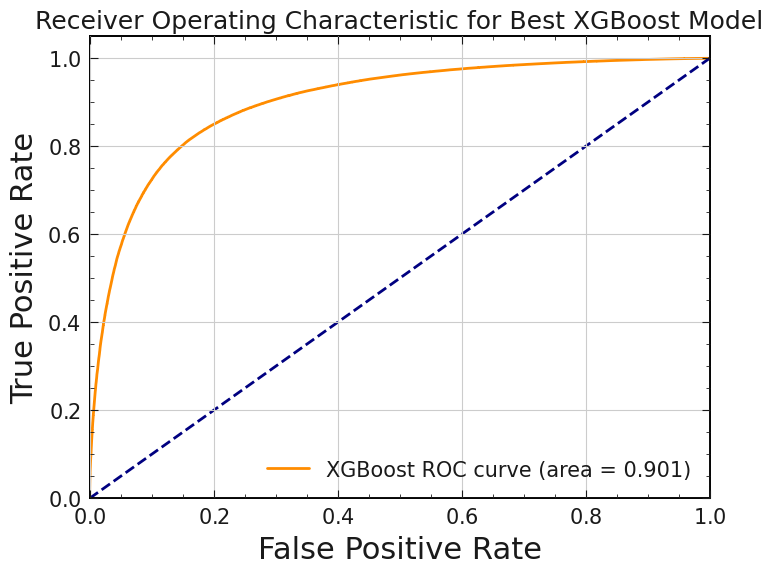

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
# plt.savefig("MC15rd_etapip_pipipi_roc_loose_v3.png")

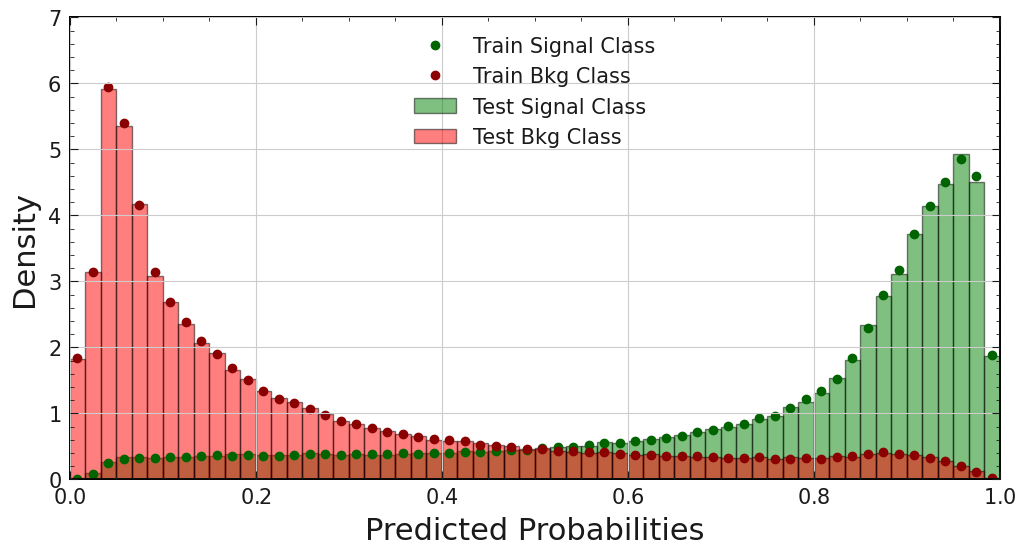

In [87]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/240919_outputs_momentum_sum.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
# plt.savefig("MC15rd_train_test_etapip_pipipi_loose_v3.png")
plt.show()

In [104]:
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v6_241211"

cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []

# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)


In [105]:
# df_bkg_apply = df_bkg
df_bkg_apply = df_bkg_apply.query('Pip_p>0.3')

In [106]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')


In [107]:
df_isSignal_false

,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
0,2.505839,8.0,2.0,421.0,23.0,0.203886,0.002720,0.0,0.764624,1.345283,2.510958,1.160557,0.312426,1.553580,-1.0
1,3.268282,40.0,0.0,113.0,0.0,0.117590,0.000434,0.0,0.988852,1.647207,2.548874,1.621075,0.632556,1.615354,-1.0
2,3.853482,7.0,7.0,431.0,431.0,-0.270685,0.000090,0.0,-0.971578,1.390296,3.360624,2.463186,0.042629,1.966251,-1.0
4,4.308715,7.0,7.0,431.0,431.0,-0.042174,0.002245,0.0,1.000000,1.949873,3.386252,2.358841,0.039015,1.972611,-1.0
5,3.030059,2.0,0.0,23.0,0.0,0.890217,0.002514,0.0,0.974203,2.613911,3.020191,0.416148,0.204444,1.750729,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898345,4.016270,2.0,0.0,23.0,0.0,0.885988,0.000117,0.0,-0.999535,3.443493,3.262219,0.572777,0.250376,1.718774,-1.0
11898348,3.459084,2.0,0.0,23.0,0.0,-0.528196,0.001086,0.0,-0.825816,0.874585,3.016559,2.584499,0.049382,1.781125,-1.0
11898349,3.959989,4.0,2.0,213.0,23.0,-0.815766,0.002256,0.0,0.718963,0.509579,2.764368,3.450410,0.312709,1.855846,-1.0
11898350,2.662990,2.0,0.0,23.0,0.0,0.817609,0.000343,0.0,0.999953,2.162747,2.635435,0.500243,0.500000,1.648854,-1.0


In [108]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Dp_CMS_p','CFT_prob','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)


In [109]:
df_isSignal_true_dropped

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane
23,4.007265,-0.044862,0.012781,0.999979
27,3.467623,-0.827879,0.094631,0.999968
113,3.338244,-0.514366,0.001449,0.995931
148,4.376947,0.163536,0.037864,1.000000
154,4.024999,-0.439657,0.042107,0.999966
...,...,...,...,...
11155751,4.742920,-0.592382,0.014510,0.999852
11155785,5.279947,0.894098,0.010469,0.999616
11155819,4.842959,-0.327389,0.067946,0.999997
11240484,3.221677,-0.912193,0.001727,-0.993810


In [110]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [111]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [112]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [113]:
# df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan-1000')

In [114]:
df_combined_all_range.columns.tolist()

['Dp_Psum',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'prob_signal']

In [115]:
df_combined = df_combined_all_range.query('Dp_M>1.85 & Dp_M<1.885')
# df_combined = df_combined_all_range.query('Dp_M>1.95 & Dp_M<1.985')

In [116]:
unique_values = df_combined['Dp_isSignal'].unique()
print(unique_values)

[1. 0.]


Best cut value: 0.77
Best figure of merit: 106.06769150516654


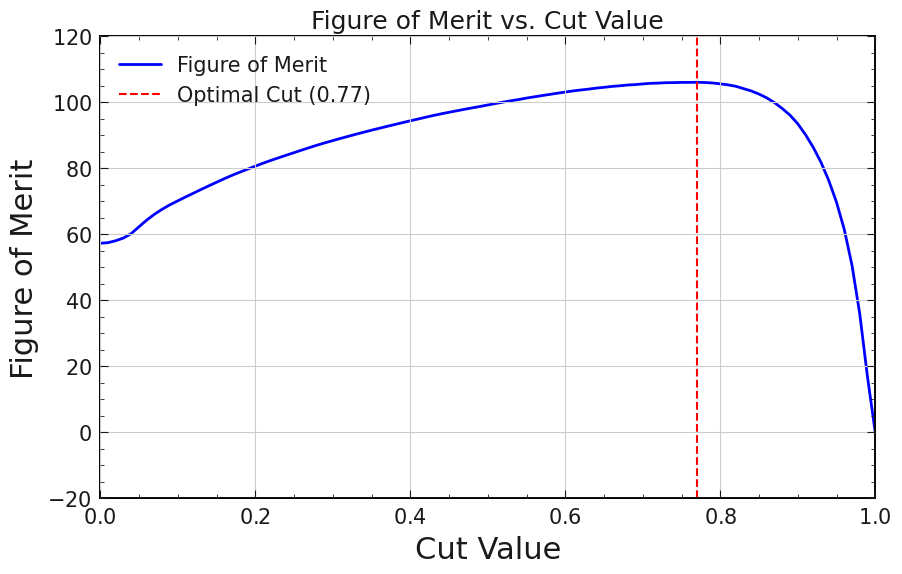

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scale = 1/4
# Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    if Nsig + Nbkg == 0:
        return 0
    return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)

# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = len(df_cut.query('(Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431'))
#     Nbkg = len(df_cut.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431'))
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)

# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = (df_cut['Dp_isSignal'] == 1).sum()
#     Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig / np.sqrt(Nsig + Nbkg)
# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
# plt.savefig("MC15rd_etapip_pipipi_FOM_loose_v3.png")

plt.show()

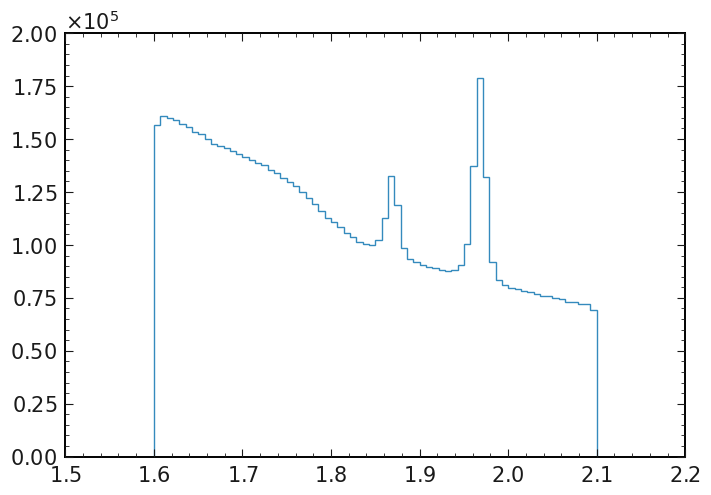

In [118]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

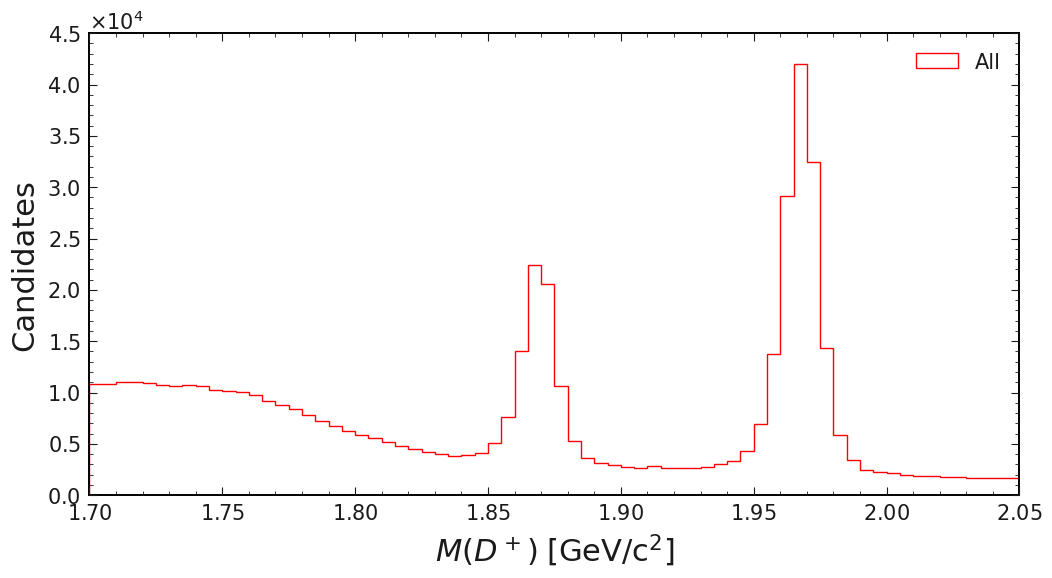

nsig=66798
nsig=16699.5


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

# plt.savefig("MC15rd_etapip_pipipi_Dp_M_all_loose_v3.png")

plt.show()


scale = 1/4
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

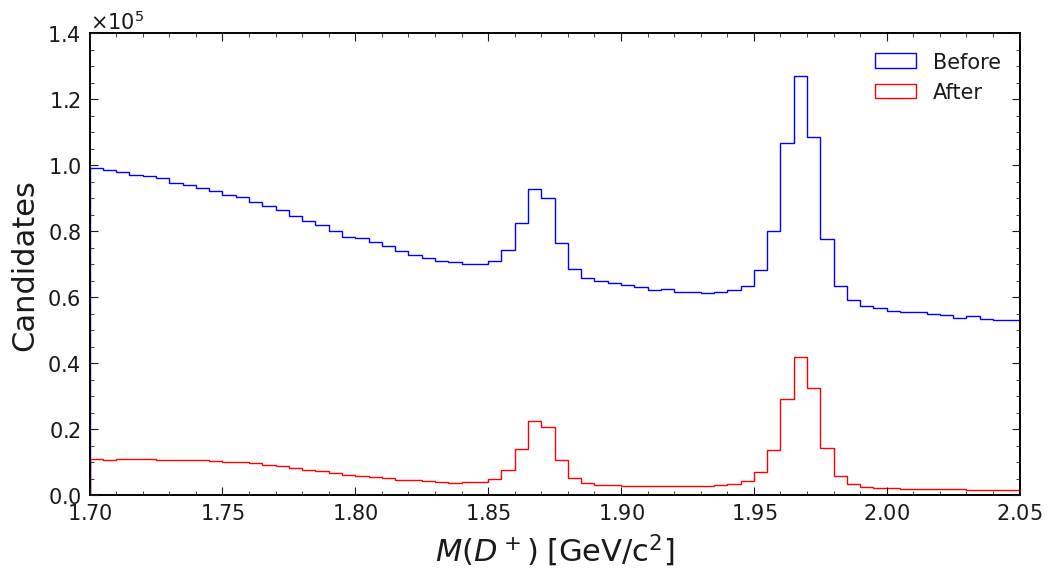

n_before=9886928
n_after=920496
cut eff=0.0931023266276441


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
# plt.savefig("MC15rd_etapip_pipipi_Dp_M_before_loose_v3.png")

plt.show()



print(f'n_before={len(df_signal)}')
print(f'n_after={len(df_background)}')
print(f'cut eff={len(df_background)/len(df_signal)}')

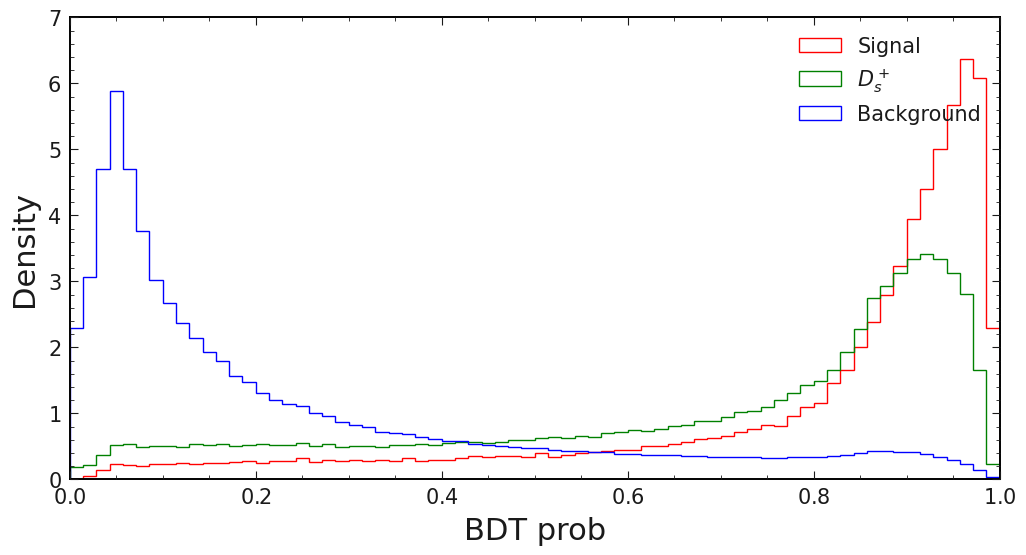

nsig=92437


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
# plt.savefig("MC15rd_etapip_pipipi_BDT_output_Dp_Ds_bkg_loose_v3.png")

plt.show()


print(f'nsig={len(df_signal)}')